In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
features = pd.read_csv('../data/strokes.csv', delimiter=";")
features.describe()


,sess,slabel,ncp,dragging,Unnamed: 15
count,8.279000e+03,8279.000000,8279.000000,8279.000000,0
mean,1.426763e+09,5028.234086,0.012079,0.092523,NaN
std,2.019834e+06,2830.714338,0.110344,0.289781,NaN
min,1.424664e+09,1.000000,0.000000,0.000000,NaN
25%,1.424768e+09,2585.500000,0.000000,0.000000,NaN
50%,1.428470e+09,5047.000000,0.000000,0.000000,NaN
75%,1.428884e+09,7451.500000,0.000000,0.000000,NaN
max,1.428884e+09,9957.000000,2.000000,1.000000,NaN


In [3]:
features['sess'].unique()

array([1424664435, 1424767500, 1424770997, 1428470230, 1428883647])

In [4]:
df = pd.read_csv('../data/strokesM.csv', delimiter=";")
df.describe()
df.count()

sess           210196
slabel         210196
t              210196
x              210196
y              210196
v              201917
vd             193638
th             201917
w              193638
c              193638
cs             193638
Unnamed: 11         0
dtype: int64

In [5]:
len(list(df['w'].index[df['w'].apply(np.isnan)]))

16558

In [6]:
print len(features.x[0]), len(features.y[0])

122 117


In [7]:
xlen=[len(features.x[i].split(',')) for i in features.index]
ylen=[len(features.y[i].split(',')) for i in features.index]
tlen=[len(features.t[i].split(',')) for i in features.index]
vlen=[len(features.v[i].split(',')) for i in features.index]
print len(xlen), len(ylen), len(tlen), len(vlen)

8279 8279 8279 8279


In [8]:
features['xlen']=xlen
features['ylen']=ylen
features['tlen']=tlen
features['vlen']=vlen

In [9]:
#features[features.xlen <> features.ylen]
features[['x','xlen','y','ylen','t','tlen','v','vlen']].head()

,x,xlen,y,ylen,t,tlen,v,vlen
0,"[957,951,938,929,914,892,859,818,775,736,692,6...",31,"[67,72,80,86,95,107,126,145,163,188,210,235,25...",31,"[671362.93680039374,671362.94482307963,671362....",31,"[973.52056260835445,1905.9995416730944,1353.38...",30
1,"[536,540,544,552,560,569,578,588,596,603,606,6...",36,"[349,349,349,349,347,345,342,339,337,334,334,3...",36,"[671363.26486538269,671363.2728991874,671363.2...",36,"[497.89609574180105,500.82865279448191,999.997...",35
2,"[653,653,652,651,651,650,]",7,"[318,318,318,318,318,319,]",7,"[671363.64895788475,671363.66479798523,671363....",7,"[0,123.12389386708335,62.984673813088776,0,176...",6
3,"[646,645,648,656,664,671,678,682,682,681,681,6...",13,"[320,320,321,324,328,330,333,333,333,327,321,3...",13,"[671363.77688850649,671363.79220050643,671363....",13,"[65.308255198139534,206.52283643765207,557.993...",12
4,"[681,679,678,677,676,675,675,675,675,675,675,6...",44,"[309,303,299,295,291,288,284,281,277,273,269,2...",44,"[671364.54483573802,671364.55271473411,671364....",44,"[802.71080909898069,517.32265790376289,505.655...",43


In [10]:
features.describe()

,sess,slabel,ncp,dragging,Unnamed: 15,xlen,ylen,tlen,vlen
count,8.279000e+03,8279.000000,8279.000000,8279.000000,0,8279.000000,8279.000000,8279.000000,8279.000000
mean,1.426763e+09,5028.234086,0.012079,0.092523,NaN,26.389057,26.389057,26.389057,25.389057
std,2.019834e+06,2830.714338,0.110344,0.289781,NaN,22.482180,22.482180,22.482180,22.482180
min,1.424664e+09,1.000000,0.000000,0.000000,NaN,5.000000,5.000000,5.000000,4.000000
25%,1.424768e+09,2585.500000,0.000000,0.000000,NaN,11.000000,11.000000,11.000000,10.000000
50%,1.428470e+09,5047.000000,0.000000,0.000000,NaN,20.000000,20.000000,20.000000,19.000000
75%,1.428884e+09,7451.500000,0.000000,0.000000,NaN,34.000000,34.000000,34.000000,33.000000
max,1.428884e+09,9957.000000,2.000000,1.000000,NaN,204.000000,204.000000,204.000000,203.000000


In [11]:
f=features.sort('xlen')

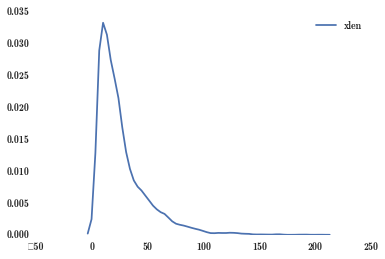

In [31]:
sns.kdeplot(features.xlen, cumulative=False, label='xlen',gridsize=50, kernel='gau')

In [13]:
r=features[(features['xlen']<30) & (features['xlen']>10)]

In [14]:
vt=r[['sess','v','t','tlen']]

In [32]:
vt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 3 to 8278
Data columns (total 7 columns):
sess    3849 non-null int64
v       3849 non-null object
t       3849 non-null object
tlen    3849 non-null int64
nv      3849 non-null object
nt      3849 non-null object
v1      3849 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 240.6+ KB


In [33]:
vt = vt.copy()

In [34]:
vt['nv'] = [map(float, vt.v[i][1:-2].split(',')) for i in vt.index]
vt['nt'] = [map(float, vt.t[i][1:-2].split(',')[:-1]) for i in vt.index]
vt.head(2)

,sess,v,t,tlen,nv,nt,v1
3,1424664435,"[65.308255198139534,206.52283643765207,557.993...","[671363.77688850649,671363.79220050643,671363....",13,"[65.3082551981, 206.522836438, 557.993977013, ...","[671363.776889, 671363.792201, 671363.807513, ...",65.308255
5,1424664435,"[124.94624786033376,126.35051514850512,123.703...","[671364.92084867705,671364.92885211867,671364....",16,"[124.94624786, 126.350515149, 123.703591495, 0...","[671364.920849, 671364.928852, 671364.936767, ...",124.946248


In [17]:
vt.nv[0:].head()

3    [65.3082551981, 206.522836438, 557.993977013, ...
5    [124.94624786, 126.350515149, 123.703591495, 0...
6    [394.103933644, 515.800469444, 374.999038135, ...
7    [249.133709006, 499.304758865, 253.949715829, ...
8    [374.039294833, 250.079568763, 499.891827997, ...
Name: nv, dtype: object

In [35]:
f = lambda x: x[0] 
vt['v1'] = vt.nv[0:].apply(f)

In [36]:
vt[['sess','nv','v1']].describe()

,sess,v1
count,3.849000e+03,3849.000000
mean,1.426801e+09,4223.659140
std,2.017542e+06,43793.317773
min,1.424664e+09,0.000000
25%,1.424768e+09,124.640904
50%,1.428470e+09,245.900205
75%,1.428884e+09,498.882714
max,1.428884e+09,1443727.698303


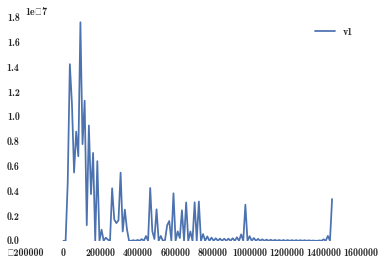

In [39]:
kvt=vt.sort('v1')
sns.kdeplot(kvt.v1, cumulative=False,gridsize=100, kernel='gau')

In [40]:
kvt.head()

,sess,v,t,tlen,nv,nt,v1
830,1424664435,"[0,195.9247655944186,333.00806765401092,681.83...","[680014.00316459895,680014.0184765989,680014.0...",13,"[0.0, 195.924765594, 333.008067654, 681.838201...","[680014.003165, 680014.018477, 680014.033789, ...",0
992,1424664435,"[0,65.308255198139534,65.308255198139534,65.30...","[688688.34113307181,688688.34915105358,688688....",14,"[0.0, 65.3082551981, 65.3082551981, 65.3082551...","[688688.341133, 688688.349151, 688688.364463, ...",0
994,1424664435,"[0,124.63989051571866,176.81404918536083,0,125...","[688689.6211188226,688689.62911927071,688689.6...",19,"[0.0, 124.639890516, 176.814049185, 0.0, 125.0...","[688689.621119, 688689.629119, 688689.637142, ...",0
3886,1424770997,"[0,124.91954650223697,125.07322397035669,125.1...","[778935.39080743887,778935.3987749581,778935.4...",13,"[0.0, 124.919546502, 125.07322397, 125.1468569...","[778935.390807, 778935.398775, 778935.40678, 7...",0
3882,1424770997,"[0,0,92.359820236132109,0,92.359820236132109,0...","[778925.16699887824,778925.17500060936,778925....",14,"[0.0, 0.0, 92.3598202361, 0.0, 92.3598202361, ...","[778925.166999, 778925.175001, 778925.190313, ...",0


In [46]:
nvt=vt[vt['v1']<500]
nvt=nvt.copy()

In [47]:
nvt.describe()

,sess,tlen,v1
count,2.908000e+03,2908.000000,2908.000000
mean,1.426743e+09,18.494154,175.067164
std,2.022562e+06,5.296990,127.312581
min,1.424664e+09,11.000000,0.000000
25%,1.424768e+09,14.000000,124.362495
50%,1.424771e+09,18.000000,125.153554
75%,1.428884e+09,23.000000,249.935894
max,1.428884e+09,29.000000,499.976053


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43ac98a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff43aad23d0>]], dtype=object)

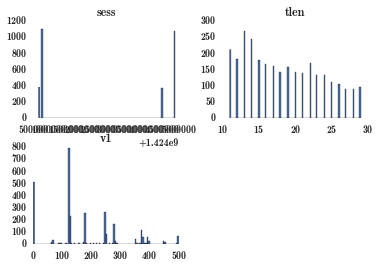

In [43]:
nvt.hist(bins=100)

In [25]:
nvt[['sess','nt','nv','v1']].head()

,sess,nt,nv,v1
3,1424664435,"[671363.776889, 671363.792201, 671363.807513, ...","[65.3082551981, 206.522836438, 557.993977013, ...",65.308255
5,1424664435,"[671364.920849, 671364.928852, 671364.936767, ...","[124.94624786, 126.350515149, 123.703591495, 0...",124.946248
6,1424664435,"[671365.320853, 671365.328877, 671365.336871, ...","[394.103933644, 515.800469444, 374.999038135, ...",394.103934
7,1424664435,"[671365.47284, 671365.480868, 671365.488879, 6...","[249.133709006, 499.304758865, 253.949715829, ...",249.133709
8,1424664435,"[671365.648843, 671365.656864, 671365.664861, ...","[374.039294833, 250.079568763, 499.891827997, ...",374.039295


In [44]:
def normalise(x):
    y=[]
    for i in x:
        y.append((i - sum(x)/len(x))/(max(x) - min(x)))
    return y

In [48]:
nvt['ntt']=[normalise(i) for i in nvt['nt'][0:]]
    

In [49]:
nvt['ntt'].head()

3    [-0.50000000076, -0.40000000076, -0.3000000007...
5    [-0.499877809013, -0.422918672518, -0.34681486...
6    [-0.500324397684, -0.388846242038, -0.27778992...
7    [-0.499783264052, -0.388315875013, -0.27708006...
8    [-0.500103335356, -0.388721018435, -0.27765939...
Name: ntt, dtype: object

In [60]:
nvt.index = range(0,len(nvt))
nvt.index
nvt.head()

,sess,v,t,tlen,nv,nt,v1,ntt
0,1424664435,"[65.308255198139534,206.52283643765207,557.993...","[671363.77688850649,671363.79220050643,671363....",13,"[65.3082551981, 206.522836438, 557.993977013, ...","[671363.776889, 671363.792201, 671363.807513, ...",65.308255,"[-0.50000000076, -0.40000000076, -0.3000000007..."
1,1424664435,"[124.94624786033376,126.35051514850512,123.703...","[671364.92084867705,671364.92885211867,671364....",16,"[124.94624786, 126.350515149, 123.703591495, 0...","[671364.920849, 671364.928852, 671364.936767, ...",124.946248,"[-0.499877809013, -0.422918672518, -0.34681486..."
2,1424664435,"[394.1039336444764,515.80046944402136,374.9990...","[671365.32085312461,671365.32887709339,671365....",12,"[394.103933644, 515.800469444, 374.999038135, ...","[671365.320853, 671365.328877, 671365.336871, ...",394.103934,"[-0.500324397684, -0.388846242038, -0.27778992..."
3,1424664435,"[249.1337090060448,499.30475886542621,253.9497...","[671365.47284025745,671365.48086807516,671365....",12,"[249.133709006, 499.304758865, 253.949715829, ...","[671365.47284, 671365.480868, 671365.488879, 6...",249.133709,"[-0.499783264052, -0.388315875013, -0.27708006..."
4,1424664435,"[374.03929483258673,250.07956876288509,499.891...","[671365.64884327492,671365.6568638226,671365.6...",12,"[374.039294833, 250.079568763, 499.891827997, ...","[671365.648843, 671365.656864, 671365.664861, ...",374.039295,"[-0.500103335356, -0.388721018435, -0.27765939..."


In [ ]:
df=nvt.groupby('sess')

In [61]:
nvt['sess'].unique()

array([1424664435, 1424767500, 1424770997, 1428470230, 1428883647])

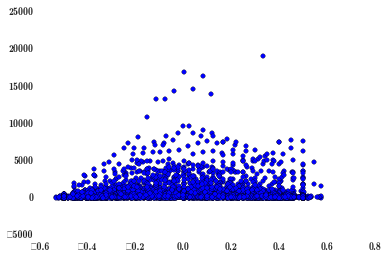

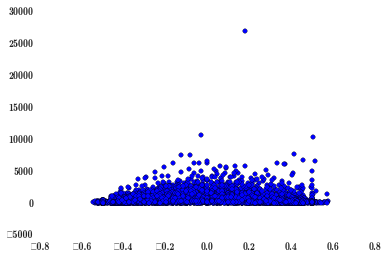

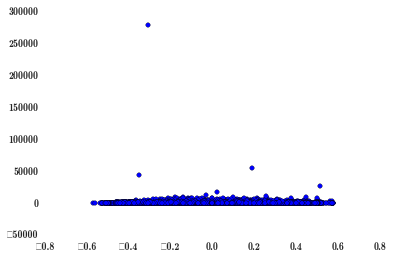

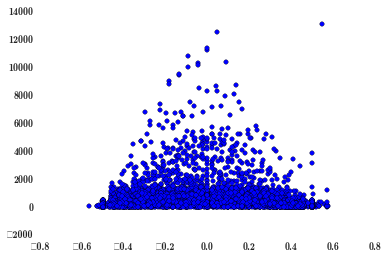

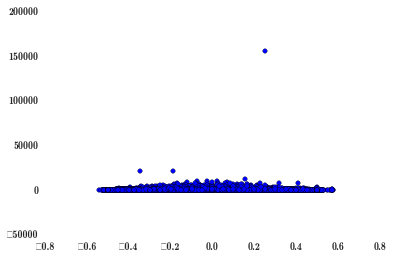

In [62]:
%matplotlib inline
for s in nvt['sess'].unique():
    for i in nvt[nvt['sess'] == s].index:
        plt.scatter(nvt['ntt'].loc[i], nvt['nv'].loc[i])
    plt.show()


In [63]:
len(nvt['ntt'].loc[4])

10

In [64]:
F=[]
for i in nvt.index:
    Xs=nvt['sess'].loc[i]
    Xt=nvt['ntt'].loc[i]
    Xv=nvt['nv'].loc[i]
    for j in range(0,len(Xt)-1):
        F.append([Xs, Xt[j], Xv[j]])
flat=pd.DataFrame(F,columns=["sess","t","v"])

In [65]:
flat.head()

,sess,t,v
0,1424664435,-0.5,65.308255
1,1424664435,-0.4,206.522836
2,1424664435,-0.3,557.993977
3,1424664435,-0.2,584.134792
4,1424664435,-0.1,475.451275


In [94]:
nvt.nv.tolist()

[[65.30825519813953,
  206.52283643765207,
  557.9939770130572,
  584.134792459776,
  475.4512745196314,
  497.37285352888784,
  261.23302079255814,
  0.0,
  397.2546076383971,
  391.8495311888372,
  457.15778638697674],
 [124.94624786033376,
  126.35051514850512,
  123.70359149542998,
  0.0,
  560.7541437760887,
  274.50399298666713,
  515.772872241316,
  452.1671864643313,
  124.71301403422639,
  395.389371060524,
  125.093297767538,
  125.03978256129511,
  279.7919545555488,
  124.91287430813155],
 [394.1039336444764,
  515.8004694440214,
  374.9990381354225,
  395.2836936267589,
  500.31965322400225,
  279.26892527972467,
  249.89249208581688,
  375.42047597035713,
  251.12699115035193,
  278.4509579079395],
 [249.1337090060448,
  499.3047588654262,
  253.9497158291389,
  369.74157902837345,
  246.52037619066266,
  533.4371118498563,
  125.00636084939777,
  122.54960403479168,
  125.16695259543157,
  124.88618902632548],
 [374.03929483258673,
  250.0795687628851,
  499.891827996852

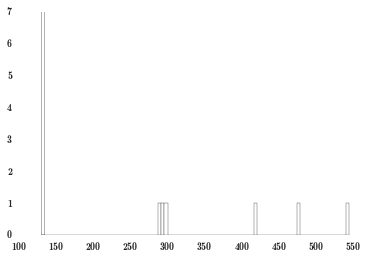

In [76]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 3000
x = nvt['ntt'][0]
y = nvt['nv'][0:1].tolist()

h = plt.hist(y, bins=100, color='w')

dist_names = ['gamma', 'beta', 'chi', 'norm',]

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)

#    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
#    pdf_fitted = dist.pdf(x, *param[:-2])

#    plt.plot(pdf_fitted, label=dist_name)
#    plt.xlim(0,47)
#plt.legend(loc='upper right')
#plt.show()


/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


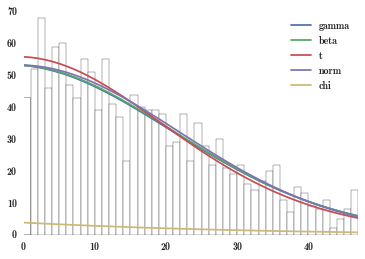

In [68]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 3000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48), color='w')

dist_names = ['gamma', 'beta', 't', 'norm', 'chi']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()


In [69]:
def flatten(*args):
    for x in args:
        if hasattr(x, '__iter__'):
            for y in flatten(*x):
                yield y
        else:
            yield x


In [70]:
v = pd.DataFrame()
l = [features.v[i][1:-2].split(',') for i in features.index]
f=list(flatten(l))
v['v'] = f


In [71]:
t = pd.DataFrame()
l = [features.t[i][1:-2].split(',')[:-1] for i in features.index]
f=list(flatten(l))
t['t'] = f


In [72]:
def session(x, y):
    r=[]
    for i in y:
        r.append([x,i])
    return r

In [73]:
features['nv'] = [map(float, features.v[i][1:-2].split(',')) for i in features.index]
features['nt'] = [map(float, features.t[i][1:-2].split(',')[:-1]) for i in features.index]
features[['nv','nt']].head(2)

,nv,nt
0,"[973.520562608, 1905.99954167, 1353.38048196, ...","[671362.9368, 671362.944823, 671362.952832, 67..."
1,"[497.896095742, 500.828652794, 999.997435028, ...","[671363.264865, 671363.272899, 671363.280886, ..."


In [ ]:
#for i in features.index:
#    print len(features.nv[i]), len(features.nt[i])

In [74]:
xx=[]
for i in features.index:
    for j in range(0,len(features.nt[i])):
        xx.append([features.sess[i], features.nt[i][j]/sum(features.nt[i]),
                                     features.nv[i][j]/sum(features.nv[i])])

In [ ]:
nf=pd.DataFrame(xx, columns=['sess','t','v'])

In [ ]:
df.dro p(['vd','w','c','cs','Unnamed: 11'], axis=1, inplace=True)

In [ ]:
df.count()

In [ ]:
df2=df[:50000].copy()

In [ ]:
df2=df.copy()

In [ ]:
type(df2)

In [ ]:
gb=df2.groupby(['slabel'])

In [ ]:
gb.describe().reindex()

In [ ]:
def normalize(group):                                                      
    mean = group.values.ravel().mean()
    std = group.values.ravel().std(ddof=1)
    return group.applymap(lambda x: (x - mean)/std)

In [ ]:
nt=[]
for _, group in df2.groupby('slabel'):
    mean = group.t.values.ravel().mean()
    min = group.t.values.ravel().min()
    max = group.t.values.ravel().max()
    std = group.t.values.ravel().std(ddof=1)
#    print "AAA", group.t.values.ravel()
    nt.append((group.t.values.ravel() - min) / (max - min))
#    print "CCC", (group.t.values.ravel() - mean) / std

In [ ]:
ntt=[item for sublist in nt for item in sublist]

In [ ]:
df2['nt'] = ntt

In [ ]:
df2.describe()

In [ ]:
df2.drop(df2.index[df2.v > 20000],inplace=True)

In [ ]:
df2.plot(x='nt', y='v', kind='scatter')

In [ ]:
df2.groupby('sess').plot('nt','v',kind='scatter')

In [ ]:
df2.groupby('slabel').plot('nt','v',kind='scatter'   )

In [ ]:
g = sns.FacetGrid(df2, col="sess")
g.map(plt.scatter, "nt", "v", alpha=.7)
g.add_legend();

In [ ]:
gb.head()

In [ ]:
df[(df.sess == 1424664435)].plot(x='t',y='v',kind='scatter',logx=False)

In [ ]:
sns.pairplot(nf, hue="sess", size=2.5);

In [ ]:
from pylab import *
import numpy

# the x distribution will be centered at -1, the y distro
# at +1 with twice the width.
x = numpy.random.randn(3000)-1
y = numpy.random.randn(3000)*2+1

hist,xedges,yedges = numpy.histogram2d(nf[nf.sess == 1424664435].t,nf[nf.sess == 1424664435].v)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1] ]
imshow(hist.T,extent=extent,interpolation='nearest',origin='lower')
colorbar()
show()
